# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("NEWPNB.csv")         #importing file with bollinger data


        


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [2]:
for i in df.index.values:                                           #setting the call values
    if i<13:
        df.at[i,'Call']="NaN"
    elif df.at[i,'Close Price']<df.at[i,'lower_band']:
        df.at[i,'Call']="Buy"
    elif df.at[i,'lower_band']<df.at[i,'Close Price']<df.at[i,'trade_14_sma']:
        df.at[i,'Call']="Hold Buy/ Liquidate Short"
    elif df.at[i,'trade_14_sma']<df.at[i,'Close Price']<df.at[i,'upper_band']:
        df.at[i,'Call']="Hold Short/ Liquidate Buy"
    else :
        df.at[i,'Call']="Short"


df


,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,trade_21,trade_34,trade_call,trade_14_sma,trade_14_std,upper_band,lower_band,Call
0,2017-05-15,PNB,EQ,169.15,169.95,171.30,166.20,166.85,166.80,168.94,...,0.000000,Slight or No change,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
1,2017-05-16,PNB,EQ,166.80,167.35,178.00,164.80,173.20,174.15,173.13,...,4.406475,Among top gainers,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2,2017-05-17,PNB,EQ,174.15,173.00,173.10,164.30,164.80,165.05,167.27,...,-5.225380,Among top losers,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
3,2017-05-18,PNB,EQ,165.05,163.40,164.40,157.90,158.25,158.50,161.06,...,-3.968494,Among top losers,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2017-05-19,PNB,EQ,158.50,159.50,162.25,154.10,155.20,155.20,157.59,...,-2.082019,Negative,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
5,2017-05-22,PNB,EQ,155.20,157.50,158.00,150.25,151.05,150.95,153.77,...,-2.738402,Negative,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
6,2017-05-23,PNB,EQ,150.95,151.95,154.35,145.55,149.10,149.75,150.19,...,-0.794965,Slight negative,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
7,2017-05-24,PNB,EQ,149.75,149.70,152.35,146.50,147.30,147.45,149.16,...,-1.535893,Negative,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
8,2017-05-25,PNB,EQ,147.45,148.50,151.90,144.35,151.20,150.70,148.28,...,2.204137,Positive,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
9,2017-05-26,PNB,EQ,150.70,151.00,153.30,149.60,150.30,150.65,151.23,...,-0.033179,Slight or No change,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN


Query 4.1 b

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [3]:
y_tr = df.iloc[:,26]                                     #creating the training set
X_tr = df.iloc[:,[8,22,24,25]]

y_test = df.iloc[df.index.max()-50:,26]                #i am using the last 50 data set as test case
X_test = df.iloc[df.index.max()-50:,[8,22,24,25]]

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)   #logistic regression model
LR.predict(X_test)
lracc=round(LR.score(X_test,y_test), 4)

SVM = svm.SVC(decision_function_shape="ovo").fit(X_tr, y_tr)        #support vetor machine classifier model
SVM.predict(X_test)
svmacc=round(SVM.score(X_test, y_test), 4)

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr)    #random forest classifier model
RF.predict(X_test)
rfacc=round(RF.score(X_test, y_test), 4)

print(f'The accuracy of logistic regression,support vector machine,random forest are {lracc},{svmacc},{rfacc} ')

The accuracy of logistic regression,support vector machine,random forest are 1.0,0.9608,0.9412 


Query 4.1 c
 
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock

In [4]:
df1 = pd.read_csv("BAJFINANCE.csv")
df1['trade_14_sma']=df1['Close Price'].rolling(14).mean()      #calculating the SMA for time frame 14 days
df1['trade_14_std']=df1['Close Price'].rolling(14).std()       #calculating the S.D for time frame 14 days
df1['upper_band']=df1['trade_14_sma']+df1['trade_14_std']*2    #finding upper band
df1['lower_band']=df1['trade_14_sma']-df1['trade_14_std']*2     #finding lower band
df1.fillna(0,inplace=True)   

x2_test=df1.iloc[:,[8,15,17,18]]
df1['call']=SVM.predict(x2_test)         #setting the call values for the new data

df1



,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,trade_14_sma,trade_14_std,upper_band,lower_band,call
0,BAJFINANCE,EQ,15-May-2017,1314.75,1323.00,1348.50,1317.65,1332.00,1332.95,1335.96,634195,8.472579e+08,16701,188623,29.74,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
1,BAJFINANCE,EQ,16-May-2017,1332.95,1337.40,1358.80,1327.20,1346.00,1347.75,1344.96,788530,1.060542e+09,22552,274106,34.76,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
2,BAJFINANCE,EQ,17-May-2017,1347.75,1350.00,1374.00,1297.50,1320.00,1324.80,1343.51,2408302,3.235570e+09,67508,468034,19.43,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
3,BAJFINANCE,EQ,18-May-2017,1324.80,1299.00,1343.00,1296.05,1310.70,1314.55,1325.97,1210985,1.605728e+09,34422,305579,25.23,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
4,BAJFINANCE,EQ,19-May-2017,1314.55,1324.00,1333.90,1265.55,1288.00,1289.15,1295.81,1167010,1.512226e+09,32394,346261,29.67,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
5,BAJFINANCE,EQ,22-May-2017,1289.15,1299.00,1304.00,1237.35,1240.00,1242.15,1264.99,873873,1.105444e+09,39772,391500,44.80,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
6,BAJFINANCE,EQ,23-May-2017,1242.15,1249.90,1265.00,1190.55,1230.70,1233.75,1231.01,1348383,1.659868e+09,60446,466036,34.56,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
7,BAJFINANCE,EQ,24-May-2017,1233.75,1234.00,1254.90,1210.00,1225.00,1224.35,1231.39,787101,9.692307e+08,42989,266289,33.83,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
8,BAJFINANCE,EQ,25-May-2017,1224.35,1230.00,1268.00,1228.25,1263.00,1258.85,1250.15,905807,1.132395e+09,38094,349445,38.58,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short
9,BAJFINANCE,EQ,26-May-2017,1258.85,1261.70,1326.70,1261.70,1314.85,1317.80,1305.26,1306793,1.705702e+09,40302,456603,34.94,0.000000,0.000000,0.000000,0.000000,Hold Buy/ Liquidate Short


Query 4.2 a

Import the stock data file of your choice

In [5]:
df2=pd.read_csv('PNB.csv')
df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27
5,PNB,EQ,22-May-2017,155.20,157.50,158.00,150.25,151.05,150.95,153.77,11857847,1.823359e+09,61559,1874308,15.81
6,PNB,EQ,23-May-2017,150.95,151.95,154.35,145.55,149.10,149.75,150.19,18177361,2.730135e+09,84779,2318975,12.76
7,PNB,EQ,24-May-2017,149.75,149.70,152.35,146.50,147.30,147.45,149.16,12578488,1.876156e+09,63143,1093155,8.69
8,PNB,EQ,25-May-2017,147.45,148.50,151.90,144.35,151.20,150.70,148.28,18805386,2.788530e+09,70546,5106397,27.15
9,PNB,EQ,26-May-2017,150.70,151.00,153.30,149.60,150.30,150.65,151.23,9285518,1.404294e+09,45352,1805638,19.45


Query 4.2 b

Define 4 new columns , whose values are: 
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price

In [6]:
df2['open_close']=(df2['Open Price']-df2['Close Price'])/df2['Open Price']*100   
df2['low_high']=(df2['High Price']-df2['Low Price'])/df2['High Price']*100
df2['roll_mean']=df2['Close Price'].rolling(5).mean()
df2['roll_std']=df2['Close Price'].rolling(5).std()

df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,open_close,low_high,roll_mean,roll_std
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09,1.853486,2.977233,NaN,NaN
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26,-4.063340,7.415730,NaN,NaN
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52,4.595376,5.083767,NaN,NaN
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34,2.998776,3.953771,NaN,NaN
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27,2.695925,5.023112,163.94,7.410078
5,PNB,EQ,22-May-2017,155.20,157.50,158.00,150.25,151.05,150.95,153.77,11857847,1.823359e+09,61559,1874308,15.81,4.158730,4.905063,160.77,9.082304
6,PNB,EQ,23-May-2017,150.95,151.95,154.35,145.55,149.10,149.75,150.19,18177361,2.730135e+09,84779,2318975,12.76,1.447845,5.701328,155.89,6.190658
7,PNB,EQ,24-May-2017,149.75,149.70,152.35,146.50,147.30,147.45,149.16,12578488,1.876156e+09,63143,1093155,8.69,1.503006,3.839842,152.37,4.434890
8,PNB,EQ,25-May-2017,147.45,148.50,151.90,144.35,151.20,150.70,148.28,18805386,2.788530e+09,70546,5106397,27.15,-1.481481,4.970375,150.81,2.815892
9,PNB,EQ,26-May-2017,150.70,151.00,153.30,149.60,150.30,150.65,151.23,9285518,1.404294e+09,45352,1805638,19.45,0.231788,2.413568,149.90,1.443087


Query 4.2 c

Create a new column 'Action' whose values are: 
1 if next day's price(Close) is greater than present day's. 
(-1) if next day's price(Close) is less than present day's. 
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [7]:
for i in df2.index:
    if i==df2.index.max():                                        #setting the action value
        break
    elif df2.at[i,'Close Price']<df2.at[i+1,'Close Price']:
        df2.at[i,'action']=1
    else:
        df2.at[i,'action']=-1
        
df2.fillna(0,inplace=True)
df2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,open_close,low_high,roll_mean,roll_std,action
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09,1.853486,2.977233,0.00,0.000000,1.0
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26,-4.063340,7.415730,0.00,0.000000,-1.0
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52,4.595376,5.083767,0.00,0.000000,-1.0
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34,2.998776,3.953771,0.00,0.000000,-1.0
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27,2.695925,5.023112,163.94,7.410078,-1.0
5,PNB,EQ,22-May-2017,155.20,157.50,158.00,150.25,151.05,150.95,153.77,11857847,1.823359e+09,61559,1874308,15.81,4.158730,4.905063,160.77,9.082304,-1.0
6,PNB,EQ,23-May-2017,150.95,151.95,154.35,145.55,149.10,149.75,150.19,18177361,2.730135e+09,84779,2318975,12.76,1.447845,5.701328,155.89,6.190658,-1.0
7,PNB,EQ,24-May-2017,149.75,149.70,152.35,146.50,147.30,147.45,149.16,12578488,1.876156e+09,63143,1093155,8.69,1.503006,3.839842,152.37,4.434890,1.0
8,PNB,EQ,25-May-2017,147.45,148.50,151.90,144.35,151.20,150.70,148.28,18805386,2.788530e+09,70546,5106397,27.15,-1.481481,4.970375,150.81,2.815892,-1.0
9,PNB,EQ,26-May-2017,150.70,151.00,153.30,149.60,150.30,150.65,151.23,9285518,1.404294e+09,45352,1805638,19.45,0.231788,2.413568,149.90,1.443087,-1.0


Query 4.2 d

Construct a classification model with the 4 new inputs and 'Action' as target

In [8]:
xdf2_tr=df2.iloc[:,[15,16,17,18]]
ydf2_tr=df2.iloc[:,19]

xdf2_test=df2.iloc[df.index.max()-50:,[15,16,17,18]]
ydf2_test=df2.iloc[df.index.max()-50:,19]

#using the random forest classifier 

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(xdf2_tr, ydf2_tr) 


Query 4.2 e

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

The accuracy of the model is 1.0


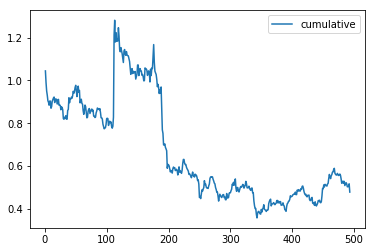

In [10]:
rfacc=round(RF.score(xdf2_test, ydf2_test), 4)
print(f'The accuracy of the model is {rfacc}')

df2['pct']=df2['Close Price'].pct_change()
df2['cumulative']=(1+df2['pct']).cumprod()

df2.plot(y=['cumulative'])   #plotting the cumulative
